## Michael DiGregorio
- Homework 1
- CPE/EE 695 Applied Machine Learning

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as pt

from typing import List, Tuple

## Function Definitions

In [2]:
def get_polynomial(x):
    return 5*x + 20*x**2 + 1*x**3

In [3]:
def get_dataset(number_of_samples, noise_scale) -> Tuple[np.ndarray]:
    x_rand = np.sort(25*(np.random.rand(number_of_samples, 1) - 0.8), -1).reshape((number_of_samples,))
    noise = (noise_scale*np.random.randn(number_of_samples, 1)).reshape((number_of_samples,))
    
    x = np.sort(x_rand)
    y = np.add(get_polynomial(x), noise)
    
    x_plot = np.linspace(x[0], x[-1], 100)
    y_plot = get_polynomial(x_plot)
    
    return (x, y, x_plot, y_plot, noise)

In [4]:
def plot_arbitrary_polynomial(x, coef, title: str = f"Polynomial"):
    x_plot = np.linspace(x[0], x[-1], 100)
    y_seq = np.zeros(len(x_plot))
    for i in range(len(coef)):
        y_seq = np.add(y_seq, coef[i]*x_plot**i)
    pt.plot(x_plot, y_seq)
    pt.title(title)
    pt.show()
                

In [5]:
def polyfit(x: np.array, y: np.array, order: int, title: str = None) -> Tuple[np.ndarray]:
    poly = np.polyfit(x, y, order, full=True)
    coefficients = poly[0]
    residuals = poly[1]
    pt.plot(x, y, 'ro')
    if title is not None:
        plot_arbitrary_polynomial(x, coefficients[::-1], title=title)
    else:
        plot_arbitrary_polynomial(x, coefficients[::-1], titlet=title)
    return (coefficients, residuals)

## Assignment Main Logic Starts Here

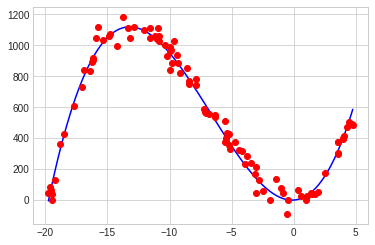

In [6]:
pt.style.use('seaborn-whitegrid')

(x, y, x_plot, y_plot, noise) = get_dataset(100, 50)
pt.plot(x_plot, y_plot, 'b')
pt.plot(x, y, 'ro')

### Question 1
1) Please plot the noisy data and the polynomial you found (in the same figure). You can use any
value of m selected from 2, 3, 4, 5, 6.


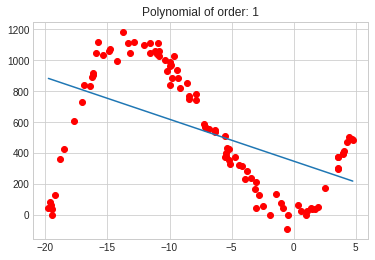

Function:  -27.042004611478276*x^1 + 348.30857260407157*x^0 

Coefficients: [-27.04200461 348.3085726 ]
Residuals: [11027507.93867591]


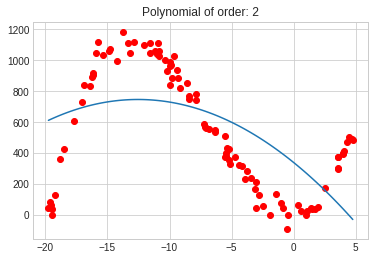

Function:  -2.58795259496011*x^2 + -64.9112416247516*x^1 + 339.52451420562704*x^0 

Coefficients: [ -2.58795259 -64.91124162 339.52451421]
Residuals: [9347397.00255125]


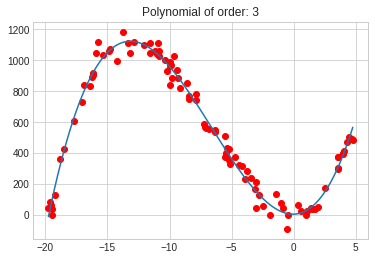

Function:  0.9902561040166546*x^3 + 19.618789814739706*x^2 + 1.8135039098589334*x^1 + 5.732984179951923*x^0 

Coefficients: [ 0.9902561  19.61878981  1.81350391  5.73298418]
Residuals: [237688.13972823]


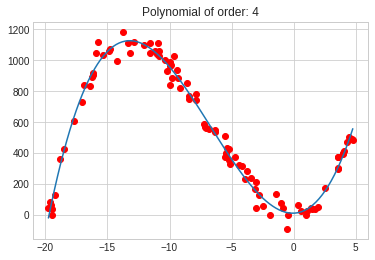

Function:  -0.002378418335651639*x^4 + 0.9185653846836603*x^3 + 19.13501281187423*x^2 + 2.6673397807025387*x^1 + 12.218665297146448*x^0 

Coefficients: [-2.37841834e-03  9.18565385e-01  1.91350128e+01  2.66733978e+00
  1.22186653e+01]
Residuals: [235690.86822321]


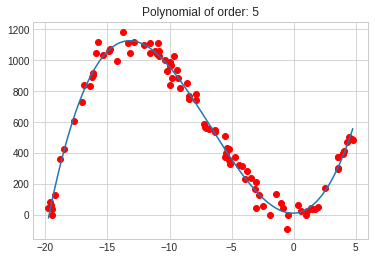

Function:  1.293641234786868e-05*x^5 + -0.0018875118642197554*x^4 + 0.9237486272566972*x^3 + 19.13988167886307*x^2 + 2.562685676836705*x^1 + 12.10904520221939*x^0 

Coefficients: [ 1.29364123e-05 -1.88751186e-03  9.23748627e-01  1.91398817e+01
  2.56268568e+00  1.21090452e+01]
Residuals: [235688.59555369]


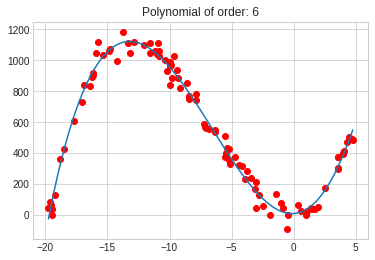

Function:  -4.7863654692269865e-05*x^6 + -0.0021366218828705176*x^5 + -0.03186994505954409*x^4 + 0.8277044501152558*x^3 + 19.77613468062532*x^2 + 5.003278593104626*x^1 + 9.912682581407129*x^0 

Coefficients: [-4.78636547e-05 -2.13662188e-03 -3.18699451e-02  8.27704450e-01
  1.97761347e+01  5.00327859e+00  9.91268258e+00]
Residuals: [234779.33988516]


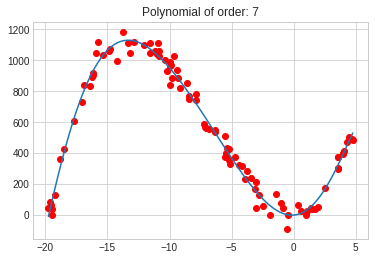

Function:  -1.766289929033461e-05*x^7 + -0.0009633894908011945*x^6 + -0.018176485336147158*x^5 + -0.12432427571885779*x^4 + 1.023950334635149*x^3 + 22.496592221100467*x^2 + 6.252021104974726*x^1 + -0.07294854997073588*x^0 

Coefficients: [-1.76628993e-05 -9.63389491e-04 -1.81764853e-02 -1.24324276e-01
  1.02395033e+00  2.24965922e+01  6.25202110e+00 -7.29485500e-02]
Residuals: [229445.90685887]


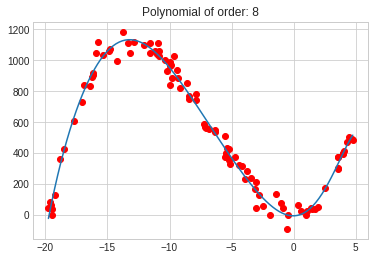

Function:  -2.1526663526840317e-06*x^8 + -0.00014511539986446437*x^7 + -0.003648263006343835*x^6 + -0.03969440984889678*x^5 + -0.12540824796256458*x^4 + 1.7179214317845422*x^3 + 23.860958343531376*x^2 + 1.4292337861894515*x^1 + -4.791693031060849*x^0 

Coefficients: [-2.15266635e-06 -1.45115400e-04 -3.64826301e-03 -3.96944098e-02
 -1.25408248e-01  1.71792143e+00  2.38609583e+01  1.42923379e+00
 -4.79169303e+00]
Residuals: [226272.67118401]


In [7]:
mse: List[float] = []
order: List[int] = [1, 2, 3, 4, 5, 6, 7, 8]
for m in order:
    (coef, res) = polyfit(x, y, m, title=f"Polynomial of order: {m}")
    function_string = ""
    for i in range(len(coef)):
        function_string += f" {coef[i]}*x^{len(coef)-i-1} "
        if i != len(coef)-1:
            function_string += '+'
    print(f"Function: {function_string}\n")
    print(f"Coefficients: {coef}")
    print(f"Residuals: {res}")
    mse += res.tolist()

### Question 2
2) Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.


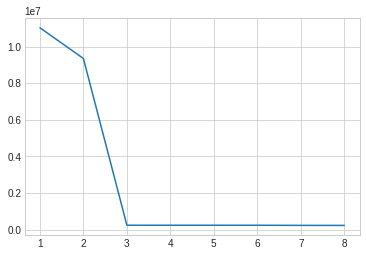

In [8]:
pt.plot(order, mse)

In [9]:
best_order = order[mse.index(min(mse))]
print(f"The best order for our function was {best_order}, however, we can see that the leading coefficients for all polynomials of orders higher than 3 are close to 0. This means that they are essentially order 3 polynomials. Additionally, the mse shows next to no improvement past order 3. Because of this, I will be using 3 as my 'best order'")

The best order for our function was 8, however, we can see that the leading coefficients for all polynomials of orders higher than 3 are close to 0. This means that they are essentially order 3 polynomials. Additionally, the mse shows next to no improvement past order 3. Because of this, I will be using 3 as my 'best order'


### Question 3
3) Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and
plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of
the returned parameters. [You need to plot a figure like in 1) for each choice of noise_scale.]


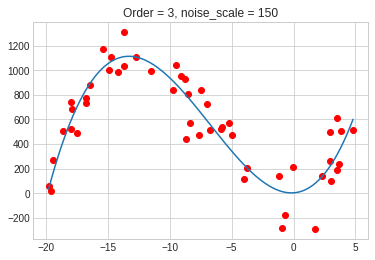

Function:  0.9787349564881721*x^3 + 19.768429036323056*x^2 + 6.517371799791404*x^1 + 5.025521799261801*x^0 

Coefficients: [ 0.97873496 19.76842904  6.5173718   5.0255218 ]
Residuals: [1175171.28835856]


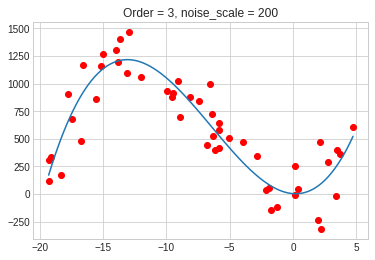

Function:  1.0295650672522219*x^3 + 19.891180481782655*x^2 + -8.616362336902245*x^1 + 4.581311312090885*x^0 

Coefficients: [ 1.02956507 19.89118048 -8.61636234  4.58131131]
Residuals: [1752741.54896131]


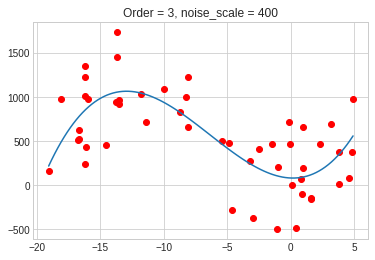

Function:  0.873984567629487*x^3 + 16.709390328624522*x^2 + -6.26719332351662*x^1 + 82.35611688155723*x^0 

Coefficients: [ 0.87398457 16.70939033 -6.26719332 82.35611688]
Residuals: [6251732.65166179]


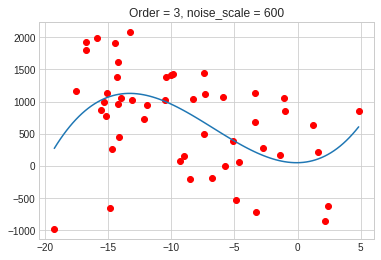

Function:  0.9352588515324493*x^3 + 18.74789440726456*x^2 + 2.997961671780759*x^1 + 51.908791887574374*x^0 

Coefficients: [ 0.93525885 18.74789441  2.99796167 51.90879189]
Residuals: [22301983.26731656]


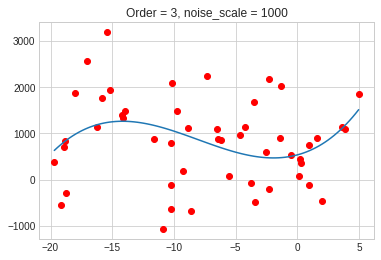

Function:  0.8686784342161521*x^3 + 21.00237334786651*x^2 + 71.87497904518784*x^1 + 537.3216680330954*x^0 

Coefficients: [  0.86867843  21.00237335  71.87497905 537.32166803]
Residuals: [39025278.764833]


In [10]:
noise_scales: List[int] = [150, 200, 400, 600, 1000]

for i in range(len(noise_scales)):
    (x, y, x_plot, y_plot, noise) = get_dataset(50, noise_scales[i])
    (coef, res) = polyfit(x, y, 3, title=f"Order = 3, noise_scale = {noise_scales[i]}")
    function_string = ""
    for i in range(len(coef)):
        function_string += f" {coef[i]}*x^{len(coef)-i-1} "
        if i != len(coef)-1:
            function_string += '+'
    print(f"Function: {function_string}\n")
    print(f"Coefficients: {coef}")
    print(f"Residuals: {res}")

### Question 4
4) Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot
the polynomials with the m found in 2). Discuss the impact of the number of samples to the
accuracy of the returned parameters. [You need to plot a figure like in 1) for each choice of
number_of_samples.]

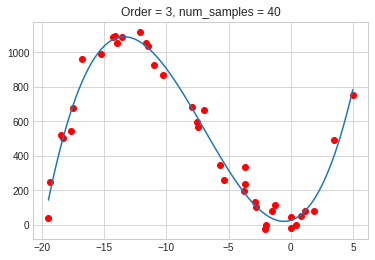

Function:  1.0144799962753708*x^3 + 21.19865954261611*x^2 + 22.343340992765423*x^1 + 25.392028313497107*x^0 

Coefficients: [ 1.01448    21.19865954 22.34334099 25.39202831]
Residuals: [161990.55618021]


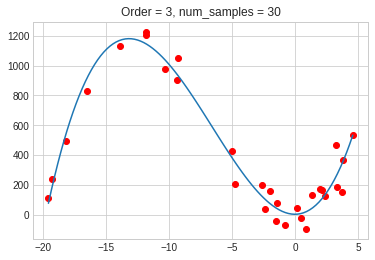

Function:  1.0352003833621026*x^3 + 20.568161970411285*x^2 + 1.7853903551216488*x^1 + 2.1853015971541043*x^0 

Coefficients: [ 1.03520038 20.56816197  1.78539036  2.1853016 ]
Residuals: [217750.93206364]


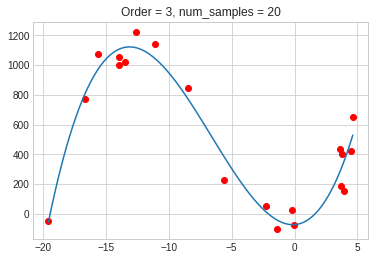

Function:  1.0919578620524861*x^3 + 21.72804376877625*x^2 + 5.955431203613223*x^1 + -73.68065265742013*x^0 

Coefficients: [  1.09195786  21.72804377   5.9554312  -73.68065266]
Residuals: [210323.42185628]


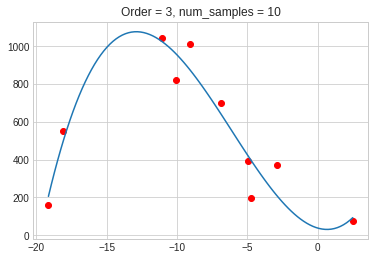

Function:  0.8397778118302912*x^3 + 15.422762733870563*x^2 + -21.36354054492861*x^1 + 38.077343601313636*x^0 

Coefficients: [  0.83977781  15.42276273 -21.36354054  38.0773436 ]
Residuals: [114983.19207629]


In [11]:
samples: List[int] = [40, 30, 20, 10]

for i in range(len(samples)):
    (x, y, x_plot, y_plot, noise) = get_dataset(samples[i], 100)
    (coef, res) = polyfit(x, y, 3, title=f"Order = 3, num_samples = {samples[i]}")
    function_string = ""
    for i in range(len(coef)):
        function_string += f" {coef[i]}*x^{len(coef)-i-1} "
        if i != len(coef)-1:
            function_string += '+'
    print(f"Function: {function_string}\n")
    print(f"Coefficients: {coef}")
    print(f"Residuals: {res}")